# Imports

In [53]:
# import os
# import sys
import numpy as np
import pandas as pd;
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.datasets import make_classification
from matplotlib import pyplot
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import keras
from keras.layers import *
from keras.models import Sequential
from ann_visualizer.visualize import ann_viz;

# Load data

In [2]:
data = pd.read_csv("../data/credit_approval.csv")

# Inspect data

In [3]:
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [4]:
data.shape

(690, 16)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      678 non-null    object 
 1   A2      678 non-null    float64
 2   A3      690 non-null    float64
 3   A4      684 non-null    object 
 4   A5      684 non-null    object 
 5   A6      681 non-null    object 
 6   A7      681 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     677 non-null    float64
 14  A15     690 non-null    int64  
 15  class   690 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 86.4+ KB


In [6]:
data.describe()

,A2,A3,A8,A11,A14,A15
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


# Data Cleaning and Processing

## Manage blank, null & nan values

In [7]:
# Replace (impute) missing values (in numerical columns) with mean value
data.fillna(data.mean(), inplace = True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      678 non-null    object 
 1   A2      690 non-null    float64
 2   A3      690 non-null    float64
 3   A4      684 non-null    object 
 4   A5      684 non-null    object 
 5   A6      681 non-null    object 
 6   A7      681 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     690 non-null    float64
 14  A15     690 non-null    int64  
 15  class   690 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 86.4+ KB


## Rename Columns

In [9]:
data.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'A15', 'class'],
      dtype='object')

In [10]:
data.rename(columns = {'A1':'Gender','A2':'Age','A3':'Debt',
                         'A4':'Married','A5':'BankCustomer',
                         'A6':'EducationLevel','A7':'Ethnicity',
                        'A8':'YearsEmployed','A9':'PriorDefault',
                         'A10':'Employed','A11':'CreditScore',
                         'A12':'DriversLicense','A13':'Citizen',
                        'A14':'ZipCode','A15':'Income','class':'Approval'
                        }, inplace = True)

In [11]:
data.columns

Index(['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel',
       'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore',
       'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'Approval'],
      dtype='object')

## Convert data to a useable format

In [12]:
data['Gender'].head()

0    b
1    a
2    a
3    b
4    b
Name: Gender, dtype: object

## For now just going to drop blank, null, nan values

In [13]:
data.dropna(inplace = True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 671 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          671 non-null    object 
 1   Age             671 non-null    float64
 2   Debt            671 non-null    float64
 3   Married         671 non-null    object 
 4   BankCustomer    671 non-null    object 
 5   EducationLevel  671 non-null    object 
 6   Ethnicity       671 non-null    object 
 7   YearsEmployed   671 non-null    float64
 8   PriorDefault    671 non-null    object 
 9   Employed        671 non-null    object 
 10  CreditScore     671 non-null    int64  
 11  DriversLicense  671 non-null    object 
 12  Citizen         671 non-null    object 
 13  ZipCode         671 non-null    float64
 14  Income          671 non-null    int64  
 15  Approval        671 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 89.1+ KB


In [15]:
# 0 = Female, 1 = Male
data['Gender'] = data['Gender'].replace(['a','b'],[1,0]).apply(np.int64)
data['Gender'].head()

0    0
1    1
2    1
3    0
4    0
Name: Gender, dtype: int64

In [16]:
data.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approval
0,0,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,1,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,1,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,0,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,0,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


## Age should be whole numbers, not decimals

In [17]:
data['Age'] = data['Age'].apply(np.int64)
data['Age'].head()

0    30
1    58
2    24
3    27
4    20
Name: Age, dtype: int64

## Values of 'u', 'y', 'l' aren't helpful - change with LabelEncoder()

In [18]:
data['Married'].value_counts()

u    510
y    159
l      2
Name: Married, dtype: int64

## Change 'Approval' column values (+/- aren't useful)

In [19]:
data['Approval'].head()

0    +
1    +
2    +
3    +
4    +
Name: Approval, dtype: object

In [20]:
# 0 = Not Approved, 1 = Approved
data['Approval'] = data['Approval'].replace(['+','-'],[1,0]).apply(np.int64)
print(data['Approval'].head())
print(data['Approval'].tail())

0    1
1    1
2    1
3    1
4    1
Name: Approval, dtype: int64
685    0
686    0
687    0
688    0
689    0
Name: Approval, dtype: int64


# Look into each column's specific data

In [21]:
# 'Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel',
# 'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore',
# 'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'Approval'
for col in data.columns:
    print(data[col].value_counts())
    print()

0    463
1    208
Name: Gender, dtype: int64

22    42
23    38
20    32
25    30
31    28
21    27
18    26
27    25
24    24
28    24
19    23
34    23
26    19
32    19
33    19
29    17
36    17
39    17
30    15
17    15
16    14
41    14
35    12
48    12
38    11
40    11
37    10
47    10
42     9
44     7
43     6
51     6
52     6
56     6
49     5
57     5
15     5
54     4
58     4
45     4
50     3
46     3
60     3
53     2
55     2
59     2
62     2
64     2
65     2
69     2
76     1
74     1
63     1
67     1
68     1
73     1
13     1
Name: Age, dtype: int64

1.500     20
3.000     19
2.500     19
1.250     16
0.750     16
          ..
2.665      1
22.000     1
13.915     1
4.915      1
10.915     1
Name: Debt, Length: 215, dtype: int64

u    510
y    159
l      2
Name: Married, dtype: int64

g     510
p     159
gg      2
Name: BankCustomer, dtype: int64

c     135
q      76
w      63
i      58
ff     53
aa     53
k      50
cc     40
m      38
x      38
d      30
e   

## Change (encode) non-numerical values to numerical values

In [22]:
le = LabelEncoder()

for col in data:
    if data[col].dtypes == 'object':
        data[col] = le.fit_transform(data[col])

In [23]:
data.tail(15)

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approval
675,1,41,1.040,1,0,0,7,0.665,0,0,0,0,0,240.0,237,0
676,1,30,10.665,1,0,10,3,0.085,0,1,12,1,0,129.0,3,0
677,0,19,7.250,1,0,9,7,0.040,0,1,1,0,0,100.0,1,0
678,1,17,10.210,1,0,5,2,0.000,0,0,0,0,0,0.0,50,0
679,1,20,1.250,1,0,1,7,0.000,0,0,0,0,0,0.0,0,0
680,0,19,0.290,1,0,8,7,0.290,0,0,0,0,0,280.0,364,0
681,0,27,1.000,2,2,3,3,3.000,0,0,0,0,0,176.0,537,0
682,0,17,3.290,1,0,6,7,0.335,0,0,0,1,0,140.0,2,0
683,0,36,0.750,2,2,3,7,0.585,0,0,0,0,0,240.0,3,0
684,0,40,3.290,1,0,9,7,3.500,0,0,0,1,2,400.0,0,0


In [24]:
data2 = data.copy()

## Feature correlations

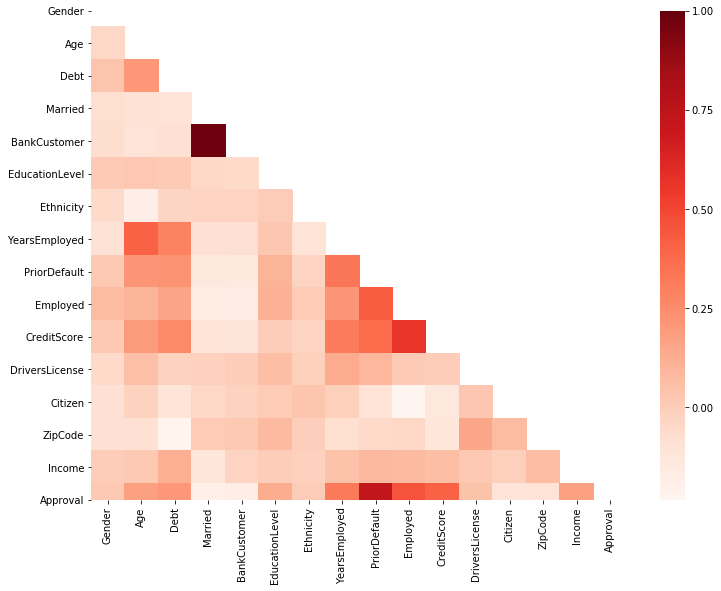

In [25]:
correlations = data.corr()
f, ax = plt.subplots(figsize = (12, 9))

mask = np.zeros_like(correlations, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(correlations, cmap ='Reds', mask = mask)

## Subset of data with significant correlation

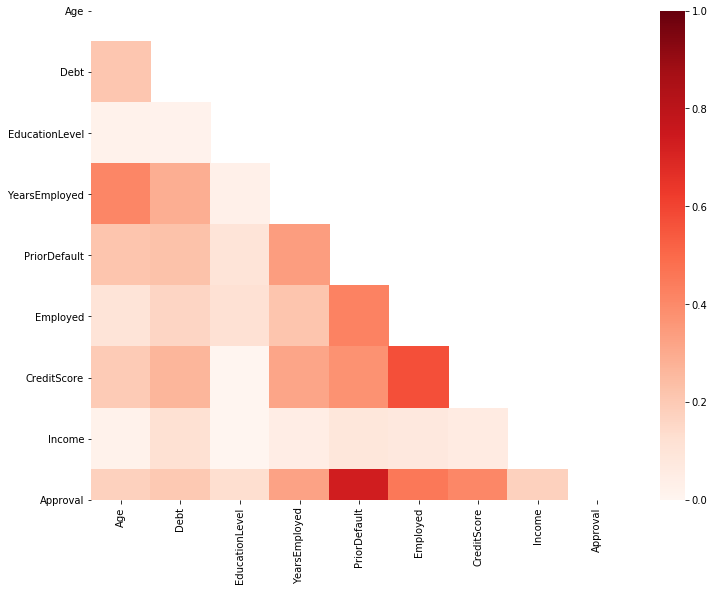

In [26]:
cols = ['Age', 'Debt', 'EducationLevel', 'YearsEmployed', 'PriorDefault',
        'Employed', 'CreditScore', 'Income', 'Approval']

sig_corr = data[cols].corr()
f, ax = plt.subplots(figsize = (12, 9))

mask = np.zeros_like(sig_corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(sig_corr, cmap ='Reds', mask = mask)

## Subset of data with most significant correlation

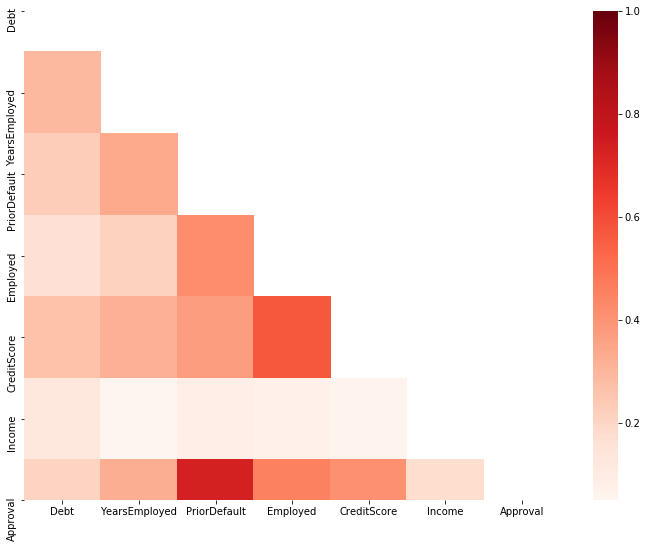

In [27]:
cols = ['Debt', 'YearsEmployed', 'PriorDefault', 'Employed',
        'CreditScore', 'Income', 'Approval']

m_sig_corr = data[cols].corr()
f, ax = plt.subplots(figsize = (12, 9))

mask = np.zeros_like(m_sig_corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(m_sig_corr, cmap ='Reds', mask = mask)

# Final subset of data pairplot

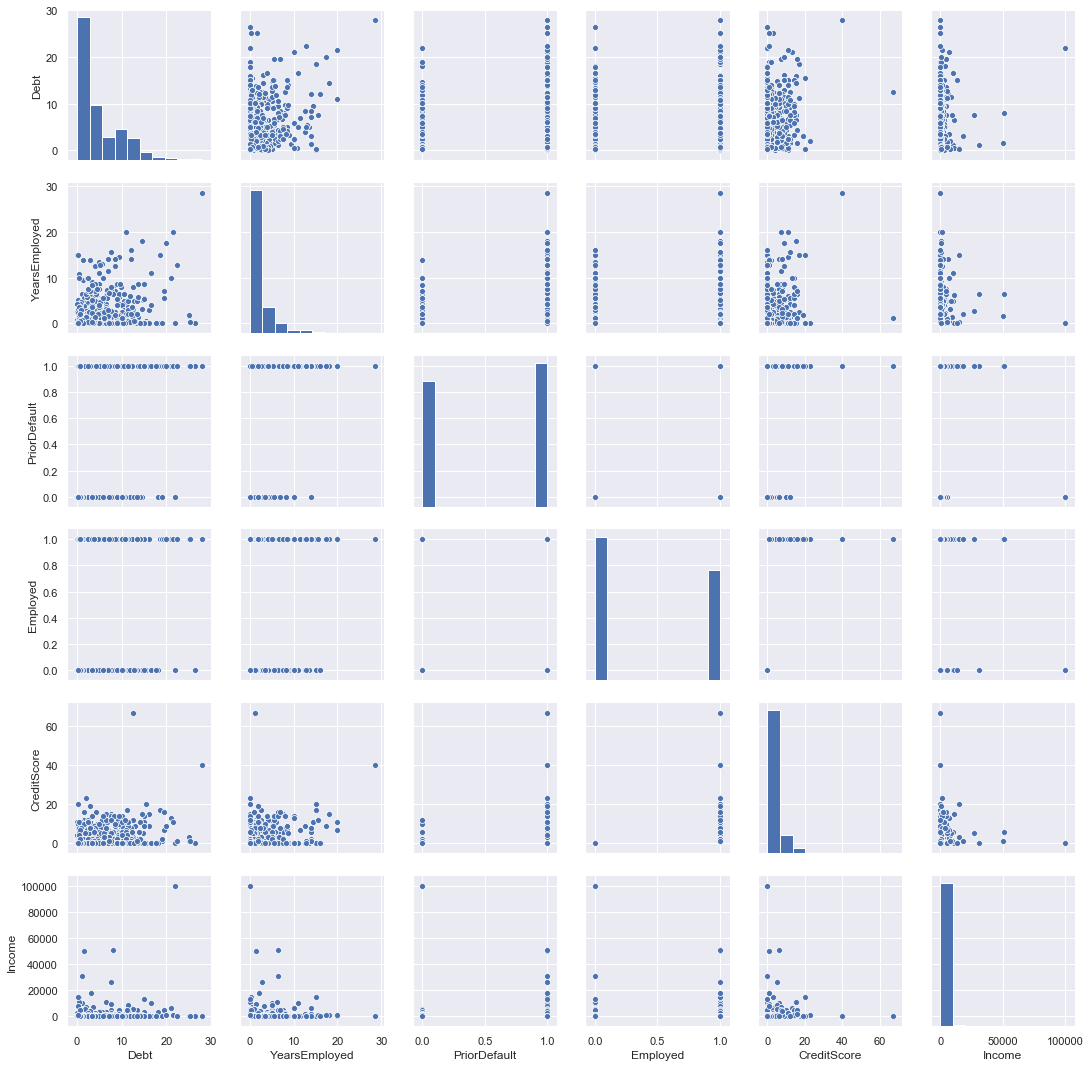

In [28]:
sns.set()
cols = ['Debt', 'YearsEmployed', 'PriorDefault', 'Employed',
        'CreditScore', 'Income']
sns.pairplot(data[cols])
plt.show()

## Data subset distributions

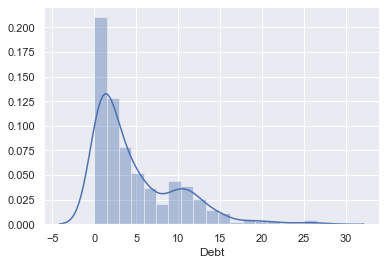

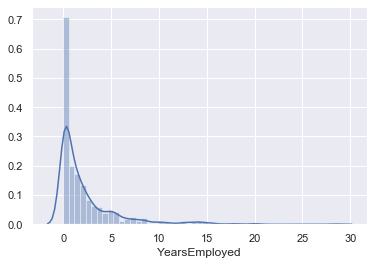

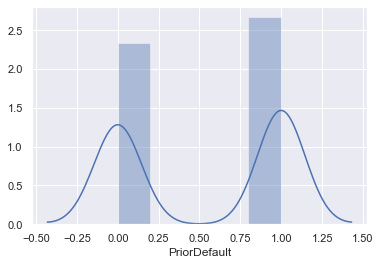

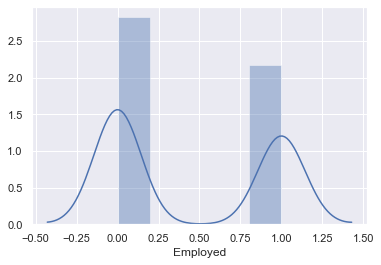

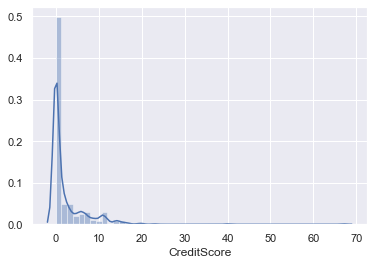

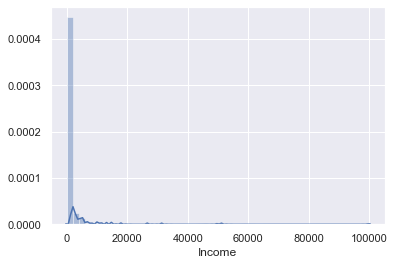

In [29]:
cols = ['Debt', 'YearsEmployed', 'PriorDefault', 'Employed',
        'CreditScore', 'Income']

def plotDistPlot(col):
    sns.distplot(col)
    plt.show()
    
    
for col in cols:
    plotDistPlot(data[col])

## Countplot of the 'Approval' column

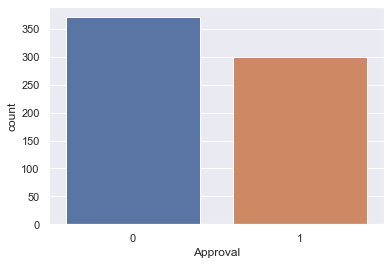

In [30]:
# 1 = Approved and 0 = Not Approved
sns.countplot(data = data, x = 'Approval')

# Train, Test, Split Before Modeling

In [31]:
# The first iterations of these models will include all columns except 'DriversLicense' and 'ZipCode'
# Later iterations of the models will have even fewer columns of data
# For the initial models, I will not be scaling the data until later iterations (if applicable)
data = data.drop(['DriversLicense', 'ZipCode'], axis = 1)

In [32]:
X = data.drop(columns = 'Approval', axis = 1)
y = data['Approval']
X2, X3 = X.copy()
y2, y3 = y.copy()
# X3 = X.copy()
# y3 = y.copy()

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## Accuracy, confusion matrix, classification report function

In [34]:
def print_metrics(y_test, y_pred):
    print('Accuracy Score is:', accuracy_score(y_test, y_pred) * 100)
    print('*****************************************************')
    print('Confusion matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('*****************************************************')
    print('Classification report:')
    print(classification_report(y_test, y_pred))

# First Logistic Regression 'Classifier' model

In [35]:
log_reg = LogisticRegression(random_state = 42, solver = 'liblinear').fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

print_metrics(y_test, y_pred)

Accuracy Score is: 87.62376237623762
*****************************************************
Confusion matrix:
[[96 19]
 [ 6 81]]
*****************************************************
Classification report:
              precision    recall  f1-score   support

           0       0.94      0.83      0.88       115
           1       0.81      0.93      0.87        87

    accuracy                           0.88       202
   macro avg       0.88      0.88      0.88       202
weighted avg       0.88      0.88      0.88       202



# First KNeighbors Classifier model

In [36]:
knn = KNeighborsClassifier().fit(X_train, y_train)
y_pred = knn.predict(X_test)

print_metrics(y_test, y_pred)

Accuracy Score is: 70.29702970297029
*****************************************************
Confusion matrix:
[[89 26]
 [34 53]]
*****************************************************
Classification report:
              precision    recall  f1-score   support

           0       0.72      0.77      0.75       115
           1       0.67      0.61      0.64        87

    accuracy                           0.70       202
   macro avg       0.70      0.69      0.69       202
weighted avg       0.70      0.70      0.70       202



# First Random Forest Classifier model

In [37]:
rf = RandomForestClassifier(random_state = 42, n_estimators = 100).fit(X_train, y_train)
y_pred = rf.predict(X_test)

print_metrics(y_test, y_pred)

Accuracy Score is: 87.12871287128714
*****************************************************
Confusion matrix:
[[100  15]
 [ 11  76]]
*****************************************************
Classification report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       115
           1       0.84      0.87      0.85        87

    accuracy                           0.87       202
   macro avg       0.87      0.87      0.87       202
weighted avg       0.87      0.87      0.87       202



## First Support Vector Machine 'Classifier' model

In [38]:
svmc = SVC(random_state = 42, gamma = 'scale').fit(X_train, y_train)
y_pred = svmc.predict(X_test)

print_metrics(y_test, y_pred)

Accuracy Score is: 64.35643564356435
*****************************************************
Confusion matrix:
[[104  11]
 [ 61  26]]
*****************************************************
Classification report:
              precision    recall  f1-score   support

           0       0.63      0.90      0.74       115
           1       0.70      0.30      0.42        87

    accuracy                           0.64       202
   macro avg       0.67      0.60      0.58       202
weighted avg       0.66      0.64      0.60       202



## First XGBoost model

In [39]:
xgb = XGBClassifier(random_state = 42).fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print_metrics(y_test, y_pred)

Accuracy Score is: 86.63366336633663
*****************************************************
Confusion matrix:
[[98 17]
 [10 77]]
*****************************************************
Classification report:
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       115
           1       0.82      0.89      0.85        87

    accuracy                           0.87       202
   macro avg       0.86      0.87      0.86       202
weighted avg       0.87      0.87      0.87       202



## First Multi-Layer Perceptron Neural Network model

In [40]:
mlnn = MLPClassifier(random_state = 42).fit(X_train, y_train)
y_pred = mlnn.predict(X_test)

print_metrics(y_test, y_pred)

Accuracy Score is: 74.75247524752476
*****************************************************
Confusion matrix:
[[92 23]
 [28 59]]
*****************************************************
Classification report:
              precision    recall  f1-score   support

           0       0.77      0.80      0.78       115
           1       0.72      0.68      0.70        87

    accuracy                           0.75       202
   macro avg       0.74      0.74      0.74       202
weighted avg       0.75      0.75      0.75       202



## First Ada Boost Classifier model

In [41]:
ada = AdaBoostClassifier(random_state = 42).fit(X_train, y_train)
y_pred = ada.predict(X_test)

print_metrics(y_test, y_pred)

Accuracy Score is: 83.16831683168317
*****************************************************
Confusion matrix:
[[94 21]
 [13 74]]
*****************************************************
Classification report:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       115
           1       0.78      0.85      0.81        87

    accuracy                           0.83       202
   macro avg       0.83      0.83      0.83       202
weighted avg       0.84      0.83      0.83       202



## First Gaussian NB model

In [42]:
gnb = GaussianNB().fit(X_train, y_train)
y_pred = gnb.predict(X_test)

print_metrics(y_test, y_pred)

Accuracy Score is: 78.21782178217822
*****************************************************
Confusion matrix:
[[102  13]
 [ 31  56]]
*****************************************************
Classification report:
              precision    recall  f1-score   support

           0       0.77      0.89      0.82       115
           1       0.81      0.64      0.72        87

    accuracy                           0.78       202
   macro avg       0.79      0.77      0.77       202
weighted avg       0.79      0.78      0.78       202



## First Gaussian Process Classifier model

In [43]:
gpc = GaussianProcessClassifier(random_state = 42).fit(X_train, y_train)
y_pred = gpc.predict(X_test)

print_metrics(y_test, y_pred)

Accuracy Score is: 68.31683168316832
*****************************************************
Confusion matrix:
[[87 28]
 [36 51]]
*****************************************************
Classification report:
              precision    recall  f1-score   support

           0       0.71      0.76      0.73       115
           1       0.65      0.59      0.61        87

    accuracy                           0.68       202
   macro avg       0.68      0.67      0.67       202
weighted avg       0.68      0.68      0.68       202



## First Quadratic Discriminant Analysis model

In [44]:
qda = QuadraticDiscriminantAnalysis().fit(X_train, y_train)
y_pred = qda.predict(X_test)

print_metrics(y_test, y_pred)

Accuracy Score is: 56.930693069306926
*****************************************************
Confusion matrix:
[[60 55]
 [32 55]]
*****************************************************
Classification report:
              precision    recall  f1-score   support

           0       0.65      0.52      0.58       115
           1       0.50      0.63      0.56        87

    accuracy                           0.57       202
   macro avg       0.58      0.58      0.57       202
weighted avg       0.59      0.57      0.57       202



## Feature Importances with Chi-Squared

In [52]:
# Apply SelectKBest class to extract all feature importances (k='all')
top_features = SelectKBest(score_func = chi2, k = 'all')
top_features.fit(X2, y2)
scores = pd.DataFrame(top_features.scores_)
columns = pd.DataFrame(X2.columns)

# Concat two df for better visualization 
top_scores = pd.concat([columns, scores], axis = 1)
top_scores.columns = ['Feature Name', 'Score']
print(top_scores.nlargest(10, 'Score'))

      Feature Name          Score
12          Income  563411.147139
10     CreditScore    1103.833737
7    YearsEmployed     356.027429
8     PriorDefault     168.020391
2             Debt     146.905936
1              Age      92.582490
9         Employed      78.862259
5   EducationLevel      37.030664
4     BankCustomer      32.971019
11         Citizen      13.141317


## Function to visualize different models' feature importances

In [46]:
def feature_imp_viz(model):
    features = data2.columns
    importances = model.feature_importances_
    indices = np.argsort(importances)
    
    model_name = 'model_name'
    
    if model == rf:
        model_name = 'Random Forest'
    elif model == xgb:
        model_name = 'XG Boost'
    else:
        model_name = 'Ada Boost'
    
    plt.title(model_name + ' Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color = 'r', align = 'center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

## Logistic Regression Feature Importance

Feature: Gender, Score: 0.06061
Feature: Age, Score: -0.01062
Feature: Debt, Score: -0.00301
Feature: Married, Score: -1.39353
Feature: BankCustomer, Score: 0.52698
Feature: EducationLevel, Score: 0.03487
Feature: Ethnicity, Score: 0.03706
Feature: YearsEmployed, Score: 0.13110
Feature: PriorDefault, Score: 3.05991
Feature: Employed, Score: 0.55641
Feature: CreditScore, Score: 0.12340
Feature: DriversLicense, Score: 0.13457
Feature: Citizen, Score: 0.00056


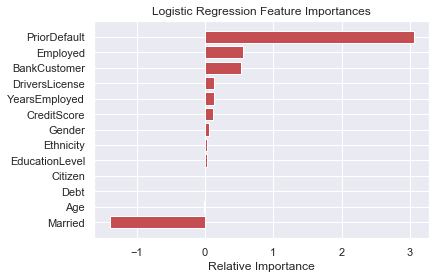

In [70]:
importance = log_reg.coef_[0]
cols = data2.columns
indices = np.argsort(importance)

for i, v in enumerate(importance):
	print('Feature: %s, Score: %.5f' % (cols[i], v))
    
plt.title('Logistic Regression Feature Importances')
plt.barh(range(len(indices)), importance[indices], color = 'r', align = 'center')
plt.yticks(range(len(indices)), [cols[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Visualize 3 different models' feature importances

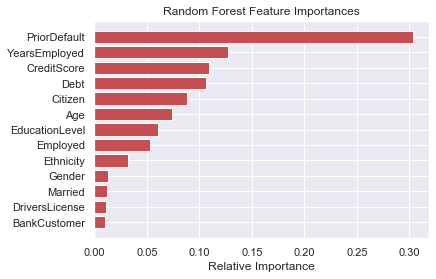

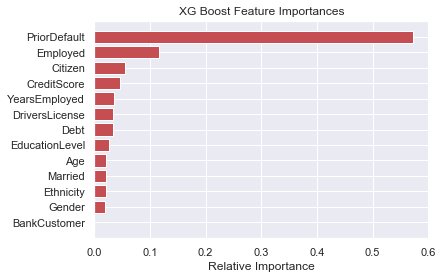

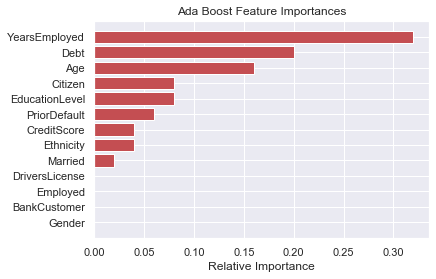

In [47]:
models = [rf, xgb, ada]
for model in models:
    feature_imp_viz(model)

# NN (Neural Network) template to work from

In [48]:
# nn model instantiation--
# nn_model = Sequential()

# add layers to the nn--
# nn_model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', input_shape=(image_size, image_size, 3)))
# nn_model.add(MaxPool2D(pool_size=(2, 2)))
# nn_model.add(Dropout(rate=0.4))
# nn_model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
# nn_model.add(MaxPool2D(pool_size=(2, 2)))
# nn_model.add(Dropout(rate=0.4))
# nn_model.add(Flatten())
# nn_model.add(Dense(units=128, activation='relu'))
# nn_model.add(Dropout(rate=0.4))
# nn_model.add(Dense(1, activation='sigmoid'))


# nn compilation--
# nn_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# not sure if these are needed still or not ?--
# steps_per_epoch = train_gen.n // batch_size
# validation_steps = val_gen.n // batch_size

# final step of the nn is to fit it--
# nn_model.fit(train_gen, steps_per_epoch=steps_per_epoch, validation_data=val_gen, epochs=5,validation_steps=validation_steps)

# Sample NN to work off of later and visualization for it

In [49]:
# The following is adapted from: 
# https://towardsdatascience.com/visualizing-artificial-neural-networks-anns-with-just-one-line-of-code-b4233607209e

# fix random seed for reproducibility
# np.random.seed(7)

# load pima indians dataset
# db_data = os.path.join(data,'diabetes.csv')
# dataset = pd.read_csv(db_data)

# split into input (X) and output (Y) variables
# X = dataset.drop(['Outcome'],axis =1)
# Y = pd.DataFrame(dataset['Outcome'])

# print("X shape:", X.shape, "Y shape:", Y.shape)

# # create model
# model11 = Sequential()
# model11.add(Dense(12, input_dim=8, activation='relu'))
# model11.add(Dense(8, activation='relu'))
# model11.add(Dense(1, activation='sigmoid'))

# Compile model
# model11.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
# model11.fit(X, Y, epochs=10, batch_size=10)

# evaluate the model
# scores = model11.evaluate(X, Y)
# print("\n%s: %.2f%%" % (model11.metrics_names[1], scores[1]*100))

In [50]:
# ann_viz(model11, view=True, filename="model11.jpg", title="Neural Network Sample Model Visualization")